In [2]:
setwd('~/r_projects/stat634/')

In [4]:
library(tidyverse)
library(ggplot2)
source('AIS/initial_testing.R')

In [5]:
ais_info <- format_inputs()

In [6]:
head(ais_info)

id,Score,State,Category,Capacity
<dbl>,<fct>,<chr>,<chr>,<dbl>
1,5,MD,Situational,1
2,3,MD,Situational,2
3,3,MD,Situational,3
4,5,MD,Situational,4
5,5,MD,Situational,5
6,3,MD,Situational,6


In [7]:
chisq_results <- chisq_test()

In [8]:
chisq_results


	Pearson's Chi-squared test

data:  prep_chi_square_tbl()
X-squared = 9.0237, df = 2, p-value = 0.01098


In [9]:
ais_summary <- ais_info %>% group_by(State, Score) %>% count()

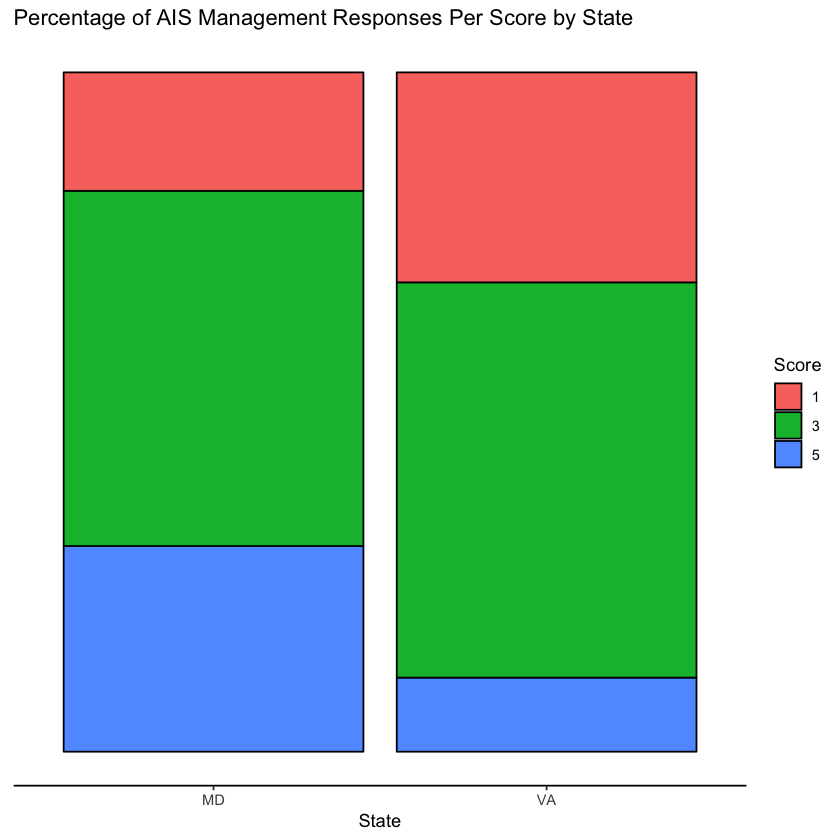

In [10]:
ggplot(ais_summary, aes(x=State,y=n,fill=Score)) + 
    geom_bar(stat="identity", position="fill", colour="black") + 
    theme_classic() + 
    theme(axis.title.y = element_blank(), axis.text.y = element_blank(), 
      axis.ticks.y = element_blank(), axis.line.y = element_blank()) + ggtitle("Percentage of AIS Management Responses Per Score by State")

In [11]:
state_cat <- ais_info %>% filter(Category=="State")

In [13]:
head(state_cat)

id,Score,State,Category,Capacity
<dbl>,<fct>,<chr>,<chr>,<dbl>
59,5,MD,State,1
60,3,MD,State,2
61,5,MD,State,3
62,5,MD,State,4
63,3,MD,State,5
64,5,MD,State,6


In [22]:
state_summary  <- state_cat %>% 
group_by(State, Score, Category) %>% 
count() %>% 
mutate(Assessment=if_else(Score=="1", "Poorly Developed", if_else(Score=="3", "Moderately Developed", "Highly Developed")))

In [23]:
state_summary

State,Score,Category,n,Assessment
<chr>,<fct>,<chr>,<int>,<chr>
MD,1,State,2,Poorly Developed
MD,3,State,5,Moderately Developed
MD,5,State,11,Highly Developed
VA,1,State,2,Poorly Developed
VA,3,State,6,Moderately Developed
VA,5,State,1,Highly Developed


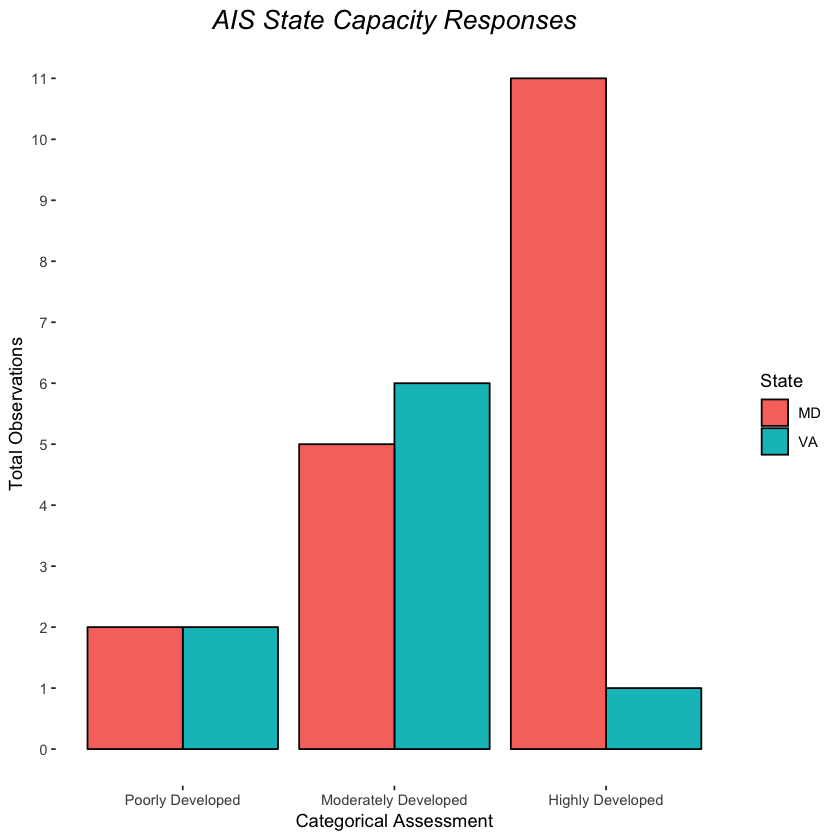

In [47]:
ggplot(state_summary, aes(x=Score, y=n, fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(limits=c(0,1,2,3,4,5,6,7,8,9,10,11)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Total Observations") +
    xlab("Categorical Assessment") +
    labs(title="AIS State Capacity Responses") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16))

In [51]:
state_percentage = state_summary %>% group_by(State) %>% mutate(percentage=n/sum(n))

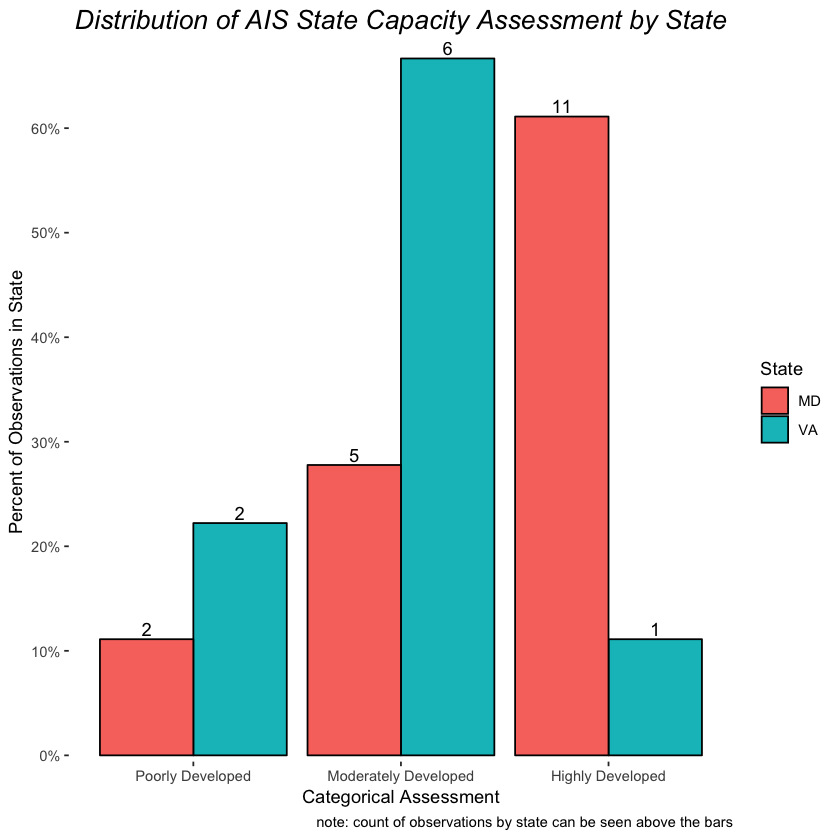

In [78]:
ggplot(state_percentage, aes(x=Score, y=(100 * percentage), fill=State)) + 
    geom_bar(stat="identity", position="dodge", colour="black") + 
    theme_classic() + 
    scale_y_discrete(labels=c("0%","10%","20%","30%","40%","50%","60%"), limits=c(0,10,20,30,40,50,60)) +
    scale_x_discrete(labels=c("Poorly Developed", "Moderately Developed", "Highly Developed")) +
    ylab("Percent of Observations in State") +
    xlab("Categorical Assessment") +
    labs(title="Distribution of AIS State Capacity Assessment by State", caption="note: count of observations by state can be seen above the bars") +
    theme(axis.line.y.left = element_blank(), axis.line.x.bottom = element_blank(), plot.title = element_text(hjust=0.5, face="italic", size=16)) +
    geom_text(aes(y=(100*percentage) + 1,label=n), position=position_dodge(width = 0.9))